# Importing Libraries and Loading Data

### Loading Libraries

In [1]:
import dataDescription as dds
import dataVisualization as dv
import utility as utils
import warnings 
warnings.filterwarnings('ignore')

### Loading the Data

In [2]:
# global mean surface temperature
gmst_df=dds.read_data('data/GHG Emissions/GMST_response_1851-2021.csv')

#cumulative emissions 
cumulative_emissions_df=dds.read_data('data/GHG Emissions/EMISSIONS_CUMULATIVE_CO2e100_1851-2021.csv')

# annual emissions
annual_emissions_df= dds.read_data('data/GHG Emissions/EMISSIONS_ANNUAL_1830-2021.csv')

# country code
country_code_df = dds.read_data('data/GHG Emissions/COUNTRY_GROUPINGS.csv')

<hr>

# Data Understanding

<hr>

## 1. Data Understanding of GMST_response

- Data includes the change in global mean surface temperature (GMST) due to emissions of the **three gases** during **1851–2021** in units °C.  

- There are **450,585** data rows in the current version.

### Undestanding Data

In [3]:
dds.data_head(gmst_df)

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,3-GHG,Fossil,1851,2.047658e-07,°C
1,Afghanistan,AFG,3-GHG,Fossil,1852,4.112079e-07,°C
2,Afghanistan,AFG,3-GHG,Fossil,1853,6.193339e-07,°C
3,Afghanistan,AFG,3-GHG,Fossil,1854,8.291519e-07,°C
4,Afghanistan,AFG,3-GHG,Fossil,1855,1.040669e-06,°C


### To understand the size of the dataset, we check its shape.



In [4]:
dds.data_shape(gmst_df)

(450585, 7)

### Checking for Missing Values

In [5]:
dds.check_null(gmst_df)

CNTR_NAME    0
ISO3         0
Gas          0
Component    0
Year         0
Data         0
Unit         0
dtype: int64

### Get Summary of the dataset to understand data types and further verify absence of missing values

In [6]:
dds.get_info(gmst_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450585 entries, 0 to 450584
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CNTR_NAME  450585 non-null  object 
 1   ISO3       450585 non-null  object 
 2   Gas        450585 non-null  object 
 3   Component  450585 non-null  object 
 4   Year       450585 non-null  int64  
 5   Data       450585 non-null  float64
 6   Unit       450585 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.1+ MB


### General Statistical Analysis to understand the overall distribution & central tendecies of the data

In [7]:
dds.get_summary(gmst_df)

,Year,Data
count,450585.000000,4.505850e+05
mean,1936.000000,3.265729e-03
std,49.362659,2.816419e-02
min,1851.000000,-1.261315e-03
25%,1893.000000,7.393887e-07
50%,1936.000000,1.834198e-05
75%,1979.000000,2.382394e-04
max,2021.000000,1.610600e+00


## 2. Data Understanding of EMISSIONS_ANNUAL
Data includes annual emissions of:
- CO2 (Pg CO2 year−1)
- CH4 (Tg CH4 year−1) 
- N2O (Tg N2O year−1) 
during **1830–2021**. 

There are **369,048** data rows in the current version. 

*Note*: that data for the years 1830–1849 are provided as these data are needed for the calculation of CO2-equivalent emissions of CH4 using the global warming potential(GWP)* approach during years **1850–1869** 


### Undestanding Data

In [8]:
dds.data_head(annual_emissions_df)

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,CH[4],Fossil,1830,0.018746,Tg~CH[4]~year^-1
1,Afghanistan,AFG,CH[4],Fossil,1831,0.018850,Tg~CH[4]~year^-1
2,Afghanistan,AFG,CH[4],Fossil,1832,0.018953,Tg~CH[4]~year^-1
3,Afghanistan,AFG,CH[4],Fossil,1833,0.019057,Tg~CH[4]~year^-1
4,Afghanistan,AFG,CH[4],Fossil,1834,0.019161,Tg~CH[4]~year^-1


### To understand the size of the dataset, we check its shape.



In [9]:
dds.data_shape(annual_emissions_df)

(369048, 7)

### Checking for Missing Values

In [10]:
dds.check_null(annual_emissions_df)

CNTR_NAME      0
ISO3           0
Gas            0
Component      0
Year           0
Data         768
Unit           0
dtype: int64

### Get Summary of the dataset to understand data types and further verify absence of missing values

In [11]:
dds.get_info(annual_emissions_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369048 entries, 0 to 369047
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CNTR_NAME  369048 non-null  object 
 1   ISO3       369048 non-null  object 
 2   Gas        369048 non-null  object 
 3   Component  369048 non-null  object 
 4   Year       369048 non-null  int64  
 5   Data       368280 non-null  float64
 6   Unit       369048 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 19.7+ MB


### General Statistical Analysis to understand the overall distribution & central tendecies of the data

In [12]:
dds.get_summary(annual_emissions_df)

,Year,Data
count,369048.000000,368280.000000
mean,1926.478734,0.733928
std,54.967060,6.863213
min,1830.000000,-0.401257
25%,1879.000000,0.000124
50%,1927.000000,0.003339
75%,1974.000000,0.043417
max,2021.000000,364.929660


## 3. Data Understanding of EMISSIONS_CUMMULATIVE
Data includes the cumulative CO2 equivalent emissions in units Pg CO2-e100 during **1851–2021**.

There are **450,585** data rows in the current version.

### Undestanding Data

In [13]:
dds.data_head(cumulative_emissions_df)

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,3-GHG,Fossil,1851,0.000455,Pg~CO[2]*-e[100]
1,Afghanistan,AFG,3-GHG,Fossil,1852,0.000913,Pg~CO[2]*-e[100]
2,Afghanistan,AFG,3-GHG,Fossil,1853,0.001375,Pg~CO[2]*-e[100]
3,Afghanistan,AFG,3-GHG,Fossil,1854,0.001841,Pg~CO[2]*-e[100]
4,Afghanistan,AFG,3-GHG,Fossil,1855,0.002311,Pg~CO[2]*-e[100]


### To understand the size of the dataset, we check its shape.



In [14]:
dds.data_shape(cumulative_emissions_df)

(450585, 7)

### Checking for Missing Values

In [15]:
dds.check_null(cumulative_emissions_df)

CNTR_NAME    0
ISO3         0
Gas          0
Component    0
Year         0
Data         0
Unit         0
dtype: int64

### Get Summary of the dataset to understand data types and further verify absence of missing values

In [16]:
dds.get_info(cumulative_emissions_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450585 entries, 0 to 450584
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CNTR_NAME  450585 non-null  object 
 1   ISO3       450585 non-null  object 
 2   Gas        450585 non-null  object 
 3   Component  450585 non-null  object 
 4   Year       450585 non-null  int64  
 5   Data       450585 non-null  float64
 6   Unit       450585 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.1+ MB


### General Statistical Analysis to understand the overall distribution & central tendecies of the data

In [17]:
dds.get_summary(cumulative_emissions_df)

,Year,Data
count,450585.000000,450585.000000
mean,1936.000000,7.251899
std,49.362659,62.541571
min,1851.000000,-2.800884
25%,1893.000000,0.001642
50%,1936.000000,0.040730
75%,1979.000000,0.529036
max,2021.000000,3576.508126


<hr>

# Data Visualizations

<hr>

### 1. Data Visualization of GMST_response

##### Univariate - temperature levels

In [18]:
gmst_df.head()

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,3-GHG,Fossil,1851,2.047658e-07,°C
1,Afghanistan,AFG,3-GHG,Fossil,1852,4.112079e-07,°C
2,Afghanistan,AFG,3-GHG,Fossil,1853,6.193339e-07,°C
3,Afghanistan,AFG,3-GHG,Fossil,1854,8.291519e-07,°C
4,Afghanistan,AFG,3-GHG,Fossil,1855,1.040669e-06,°C


##### Univariate Analysis targeting temperature levels

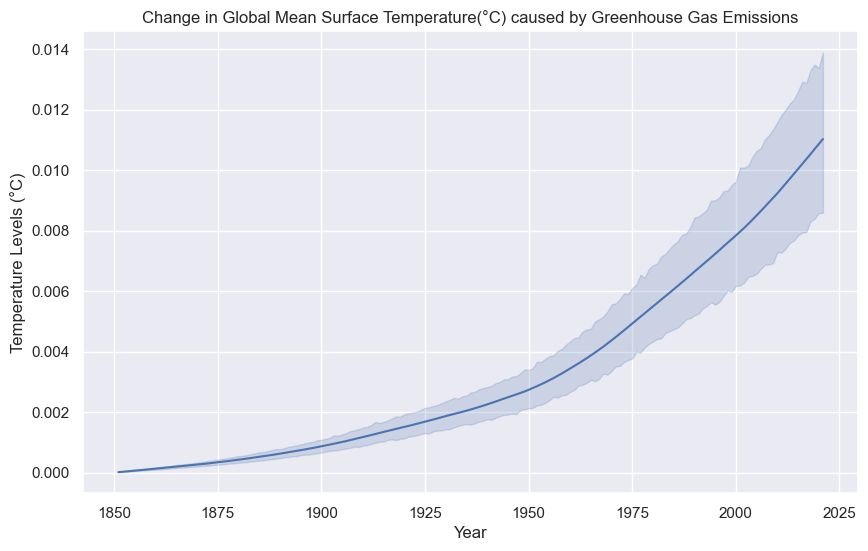

In [19]:
dv.plot_line_graph(df=gmst_df,x="Year",y="Data",x_label="Year",y_label="Temperature Levels (°C)",title="Change in Global Mean Surface Temperature(°C) caused by Greenhouse Gas Emissions")

##### Univariate Analysis targeting Component Field types

In [20]:
gmst_df.head()

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,3-GHG,Fossil,1851,2.047658e-07,°C
1,Afghanistan,AFG,3-GHG,Fossil,1852,4.112079e-07,°C
2,Afghanistan,AFG,3-GHG,Fossil,1853,6.193339e-07,°C
3,Afghanistan,AFG,3-GHG,Fossil,1854,8.291519e-07,°C
4,Afghanistan,AFG,3-GHG,Fossil,1855,1.040669e-06,°C


In [21]:
component_counts =utils.get_category_counts(gmst_df['Component'])
component_index = utils.get_category_index(component_counts)

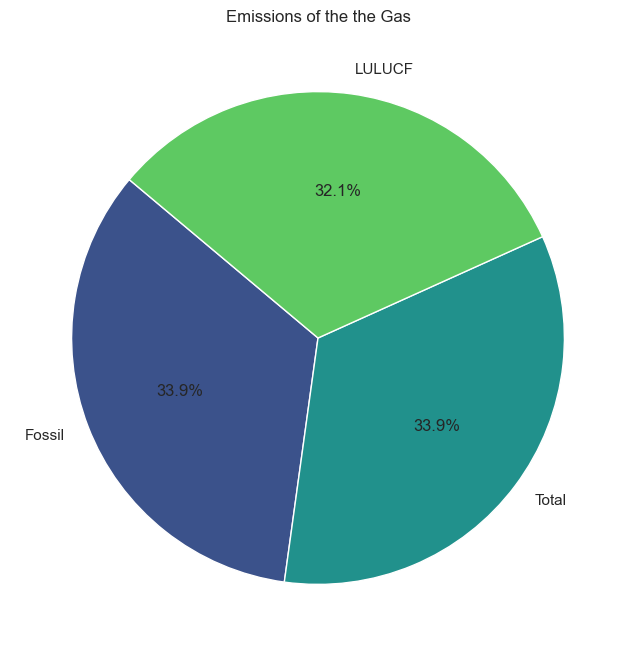

In [22]:
dv.plot_pie_chart(df=component_counts , labels=component_index, title="Emissions of the the Gas")

##### Univariate Analysis targeting GAS types

In [23]:
gas_type_counts =utils.get_category_counts(gmst_df['Gas'])
gas_type_index = utils.get_category_index(gas_type_counts)

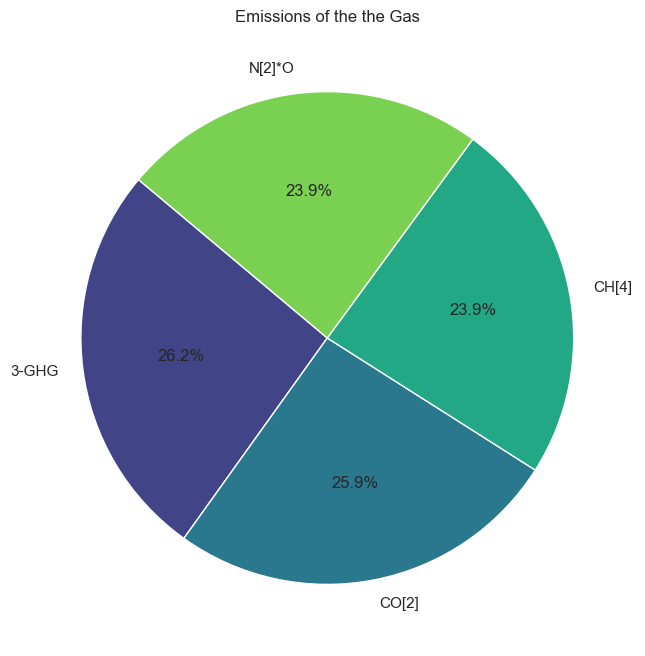

In [24]:
dv.plot_pie_chart(df=gas_type_counts , labels=gas_type_index, title="Emissions of the the Gas")

##### Univariate Analysis targeting Country types

In [25]:
country_count = utils.get_category_counts(gmst_df['CNTR_NAME'])
country_index = utils.get_category_index(country_count)

In [26]:
country_count.describe()

count     236.000000
mean     1909.258475
std       385.858905
min       684.000000
25%      2052.000000
50%      2052.000000
75%      2052.000000
max      2052.000000
Name: count, dtype: float64

### 2. Data Visualization of Annual Emissions of CO2

In [27]:
annual_emissions_df.head()

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,CH[4],Fossil,1830,0.018746,Tg~CH[4]~year^-1
1,Afghanistan,AFG,CH[4],Fossil,1831,0.018850,Tg~CH[4]~year^-1
2,Afghanistan,AFG,CH[4],Fossil,1832,0.018953,Tg~CH[4]~year^-1
3,Afghanistan,AFG,CH[4],Fossil,1833,0.019057,Tg~CH[4]~year^-1
4,Afghanistan,AFG,CH[4],Fossil,1834,0.019161,Tg~CH[4]~year^-1


##### Univariate Analysis targeting Annual Gas levels ()

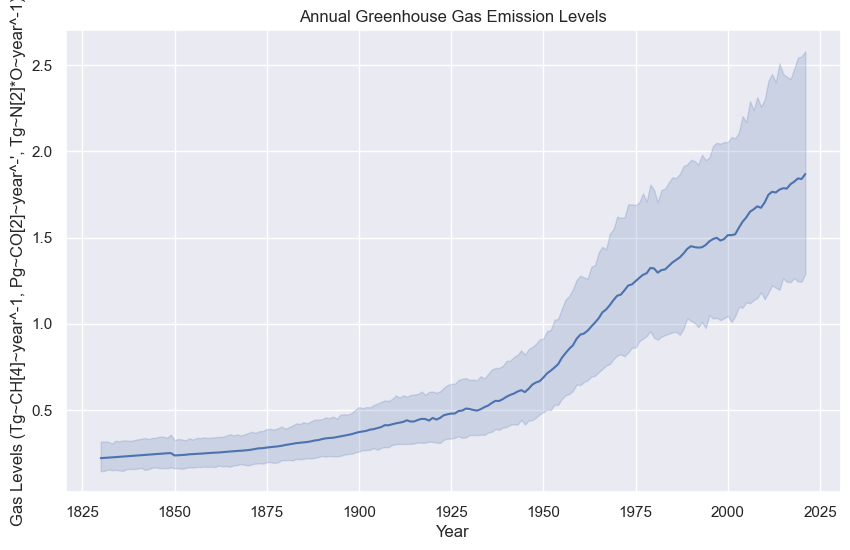

In [28]:
dv.plot_line_graph(df=annual_emissions_df,x="Year",y="Data",x_label="Year",y_label="Gas Levels (Tg~CH[4]~year^-1, Pg~CO[2]~year^-', Tg~N[2]*O~year^-1)",title="Annual Greenhouse Gas Emission Levels")

##### Univariate Analysis targeting Component Field types

In [29]:
annual_component_counts =utils.get_category_counts(annual_emissions_df['Component'])
annual_component_index = utils.get_category_index(annual_component_counts)

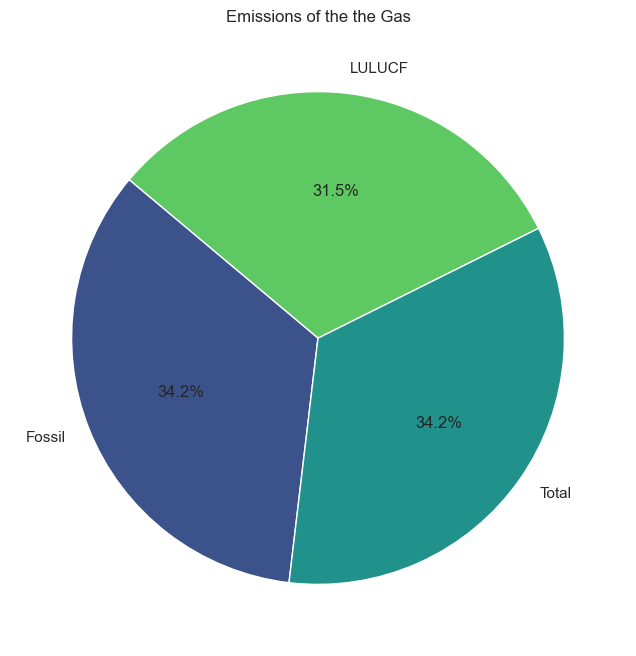

In [30]:
dv.plot_pie_chart(df=annual_component_counts , labels=annual_component_index, title="Emissions of the the Gas")

##### Univariate Analysis targeting Country types

In [31]:
annual_country_count = utils.get_category_counts(annual_emissions_df['CNTR_NAME'])
annual_country_index = utils.get_category_index(annual_country_count)

In [32]:
annual_country_count.describe()

count     236.000000
mean     1563.762712
std       388.890242
min       384.000000
25%      1708.000000
50%      1708.000000
75%      1708.000000
max      1708.000000
Name: count, dtype: float64

### 3. Data Visualization of Cumulative Emissions

In [33]:
cumulative_emissions_df.head()

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,3-GHG,Fossil,1851,0.000455,Pg~CO[2]*-e[100]
1,Afghanistan,AFG,3-GHG,Fossil,1852,0.000913,Pg~CO[2]*-e[100]
2,Afghanistan,AFG,3-GHG,Fossil,1853,0.001375,Pg~CO[2]*-e[100]
3,Afghanistan,AFG,3-GHG,Fossil,1854,0.001841,Pg~CO[2]*-e[100]
4,Afghanistan,AFG,3-GHG,Fossil,1855,0.002311,Pg~CO[2]*-e[100]


##### Univariate - Gas levels

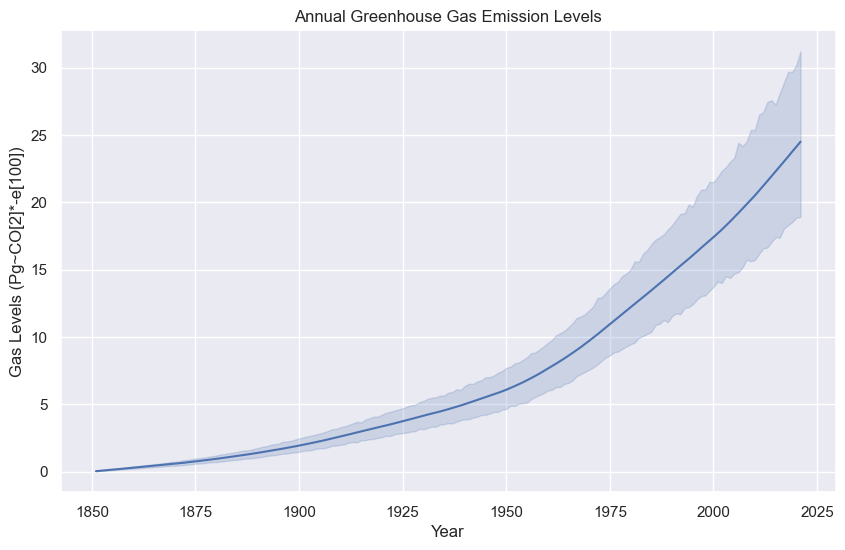

In [34]:
dv.plot_line_graph(df=cumulative_emissions_df,x="Year",y="Data",x_label="Year",y_label="Gas Levels (Pg~CO[2]*-e[100])",title="Annual Greenhouse Gas Emission Levels")

##### Univariate Analysis targeting Component Field types

In [35]:
cumulative_component_counts =utils.get_category_counts(cumulative_emissions_df['Component'])
cumulative_component_index = utils.get_category_index(cumulative_component_counts)

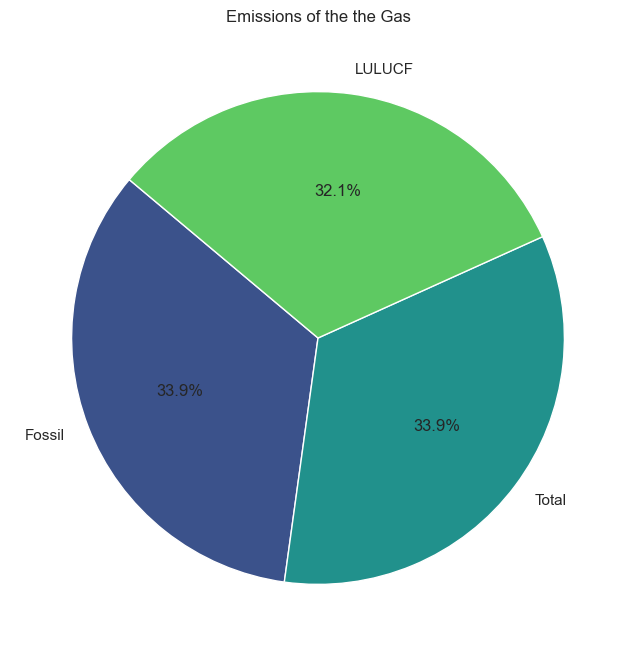

In [36]:
dv.plot_pie_chart(df=cumulative_component_counts , labels=cumulative_component_index, title="Emissions of the the Gas")

##### Univariate Analysis targeting Country types

In [37]:
cumulative_country_count = utils.get_category_counts(cumulative_emissions_df['CNTR_NAME'])
cumulative_country_index = utils.get_category_index(cumulative_country_count)

In [38]:
cumulative_country_count.describe()

count     236.000000
mean     1909.258475
std       385.858905
min       684.000000
25%      2052.000000
50%      2052.000000
75%      2052.000000
max      2052.000000
Name: count, dtype: float64

<hr>

# Data Preparation

<hr>

- Select Data
- Clean Data
- Construct Data
- Integrate
- Format Data

<hr>

# Data Modeling

<hr>

- Technique Selection
- Design Tests
- Build Model
- Model Assesment